<a href="https://colab.research.google.com/github/athenianravenclaw/Estimation-theory/blob/main/MVUE_Estimator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Straight line fitting 1 iteration



Estimated parameters (theta_hat(x)):
A: 2000.0475799258375
B: 2.989133100333986


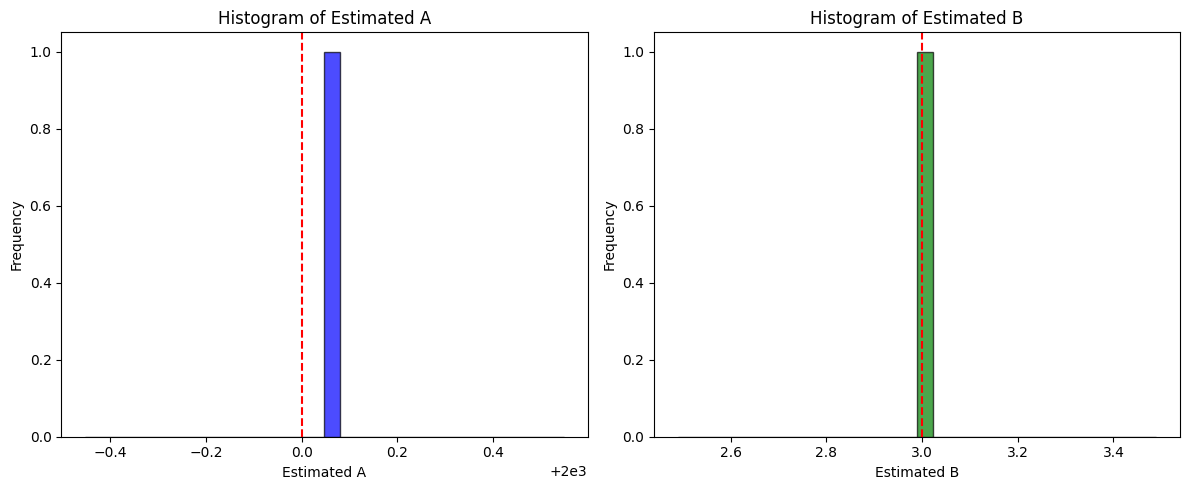

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def fisher_information_matrix(H, sigma2):
    """
    Compute the Fisher Information Matrix (FIM) for a linear model.

    H: Observation matrix (N x p)
    sigma2: Variance of the noise (scalar)

    Returns:
    FIM: Fisher Information Matrix (p x p)
    """
    return (H.T @ H) / sigma2

def gradient_log_likelihood(theta, H, x, sigma2):
    """
    Compute the gradient of the log-likelihood function with respect to theta.

    theta: Parameter vector (p x 1)
    H: Observation matrix (N x p)
    x: Observed data vector (N x 1)
    sigma2: Variance of the noise (scalar)

    Returns:
    grad_log_likelihood: Gradient of the log-likelihood function (p x 1)
    """
    residual = x - H @ theta
    grad_log_likelihood = - (1 / sigma2) * H.T @ residual
    return grad_log_likelihood.reshape(-1, 1)  # Ensure it is a (p, 1) array

def theta_hat(x, H, sigma2):
    """
    Compute the theta_hat(x) using the Fisher-Rao factorization.

    x: Observed data vector (N x 1)
    H: Observation matrix (N x p)
    sigma2: Variance of the noise (scalar)

    Returns:
    theta_hat: Estimated parameters (p x 1)
    """
    # Compute FIM
    FIM = fisher_information_matrix(H, sigma2)

    # Compute MVUE estimate
    H_T_H_inv = np.linalg.inv(H.T @ H)
    theta_mv = H_T_H_inv @ H.T @ x

    # Compute gradient of log-likelihood
    grad_log_likelihood = gradient_log_likelihood(theta_mv, H, x, sigma2)

    # Compute theta_hat(x) using Fisher-Rao factorization
    theta_hat = theta_mv + np.linalg.inv(FIM) @ grad_log_likelihood

    return theta_hat

# Example usage:
np.random.seed(42)
N = 10000  # Number of observations
sigma2 = 10  # Variance of the noise

# True parameters A and B for the linear model y = A + Bx
A_true = 2000
B_true = 3

# Generate x values and corresponding y = A + Bx with Gaussian noise
x_vals = np.linspace(0, 10, N)
y_true = A_true + B_true * x_vals
noise = np.random.normal(0, np.sqrt(sigma2), N)
y_observed = y_true + noise

# Observation matrix H for the model y = A + Bx
H = np.vstack((np.ones(N), x_vals)).T

# Convert y_observed to a column vector
y_observed = y_observed.reshape(-1, 1)

# Apply the theta_hat(x) estimator
theta_hat_estimate = theta_hat(y_observed, H, sigma2)

# Extract the estimated parameters A and B
A_hat, B_hat = theta_hat_estimate.flatten()

# Display the results
print(f"Estimated parameters (theta_hat(x)):")
print(f"A: {A_hat}")
print(f"B: {B_hat}")

# Plot histogram of parameter estimates
plt.figure(figsize=(12, 5))

# Histogram for A
plt.subplot(1, 2, 1)
plt.hist(A_hat, bins=30, alpha=0.7, color='blue', edgecolor='black')
plt.axvline(A_true, color='red', linestyle='dashed', linewidth=1.5)
plt.title('Histogram of Estimated A')
plt.xlabel('Estimated A')
plt.ylabel('Frequency')

# Histogram for B
plt.subplot(1, 2, 2)
plt.hist(B_hat, bins=30, alpha=0.7, color='green', edgecolor='black')
plt.axvline(B_true, color='red', linestyle='dashed', linewidth=1.5)
plt.title('Histogram of Estimated B')
plt.xlabel('Estimated B')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()




Straight line fitting 1000 iterations


A: 2000.0035192793707
B: 2.9992580132008335


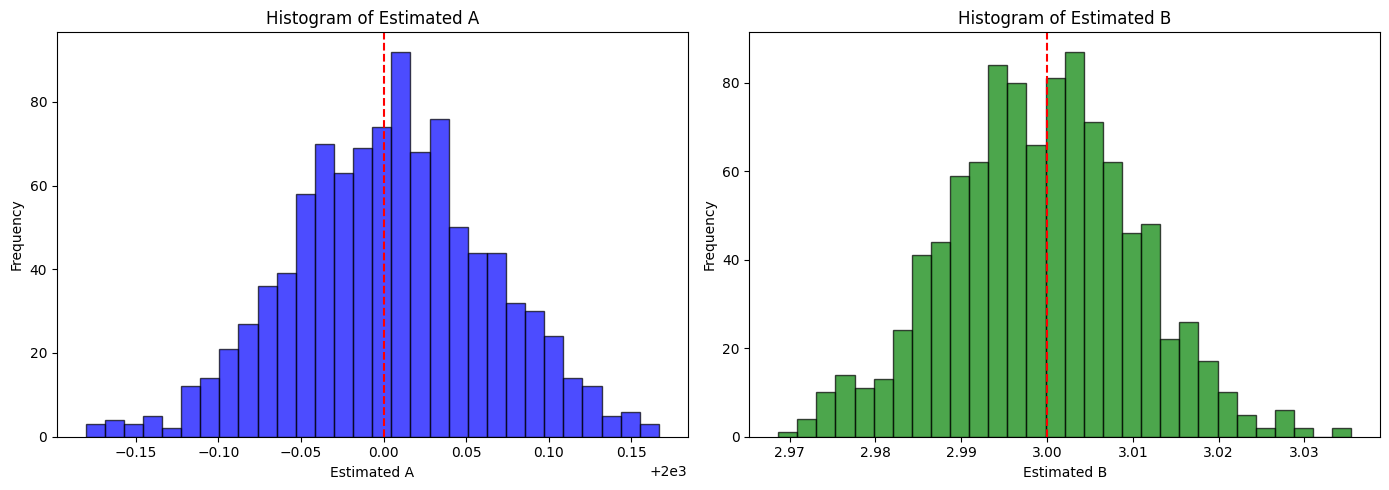

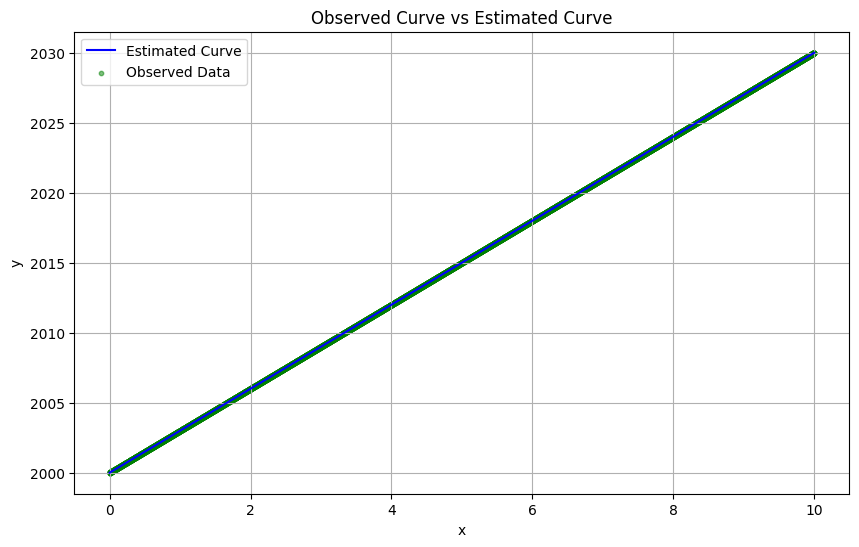

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def MVUE_estimator(H, x, sigma2):
    """
    Compute the Minimum Variance Unbiased Estimator (MVUE) for linear models
    using Fisher Information Matrix and Cramér-Rao Lower Bound (CRLB).

    H: Observation matrix (N x p)
    x: Observed data vector (N x 1)
    sigma2: Variance of the noise (scalar)

    Returns:
    theta_hat: MVUE estimate of the parameters (p x 1)
    covariance_theta: Covariance matrix of the estimator (p x p)
    covariance_theta_crlb: Covariance matrix of the estimator (CRLB)
    """
    # Compute MVUE estimate
    H_T_H_inv = np.linalg.inv(H.T @ H)
    theta_hat = H_T_H_inv @ H.T @ x

    # Covariance matrix using MVUE formula
    covariance_theta_mvue = sigma2 * H_T_H_inv

    # Fisher Information Matrix (FIM)
    FIM = (H.T @ H) / sigma2

    # CRLB: Inverse of FIM gives the lower bound on covariance
    covariance_theta_crlb = np.linalg.inv(FIM)

    return theta_hat, covariance_theta_mvue, covariance_theta_crlb

def log_likelihood(theta, H, x, sigma2):
    """
    Compute the log-likelihood function for a given parameter theta.

    theta: Parameter vector (p x 1)
    H: Observation matrix (N x p)
    x: Observed data vector (N x 1)
    sigma2: Variance of the noise (scalar)

    Returns:
    log_likelihood: Log-likelihood value
    """
    residual = x - H @ theta
    log_likelihood = -0.5 * np.sum((residual**2) / sigma2 + np.log(2 * np.pi * sigma2))
    return log_likelihood

def run_estimations(num_iterations, N, sigma2, true_params):
    """
    Run multiple iterations of parameter estimation and average the results.

    num_iterations: Number of iterations to run
    N: Number of observations
    sigma2: Variance of the noise (scalar)
    true_params: Tuple of true parameters (A, B)

    Returns:
    mean_estimates: Mean of the estimated parameters across all iterations
    all_estimates: List of estimated parameters from all iterations
    """
    all_estimates = []

    for _ in range(num_iterations):
        # True parameters
        A_true, B_true = true_params

        # Generate synthetic data
        x_vals = np.linspace(0, 10, N)
        y_true = A_true + B_true * x_vals
        noise = np.random.normal(0, np.sqrt(sigma2), N)
        y_observed = y_true + noise

        # Observation matrix H for the model y = A + Bx
        H = np.vstack((np.ones(N), x_vals)).T

        # Convert y_observed to a column vector
        y_observed = y_observed.reshape(-1, 1)

        # Apply the MVUE estimator
        theta_hat_estimate, _, _ = MVUE_estimator(H, y_observed, sigma2)

        all_estimates.append(theta_hat_estimate.flatten())

    # Convert all estimates to a numpy array
    all_estimates = np.array(all_estimates)

    # Compute the mean of estimates
    mean_estimates = np.mean(all_estimates, axis=0)

    return mean_estimates, all_estimates

# Parameters
N = 10000  # Number of observations
sigma2 = 10  # Variance of the noise
num_iterations = 1000  # Number of iterations
true_params = (2000, 3)  # True values for A and B

# Run estimations
mean_estimates, all_estimates = run_estimations(num_iterations, N, sigma2, true_params)

# Extract the mean estimated parameters A and B
A_mean, B_mean = mean_estimates

# Display the results

print(f"A: {A_mean}")
print(f"B: {B_mean}")

# Plot histograms of estimated parameters
plt.figure(figsize=(14, 5))

# Histogram for A
plt.subplot(1, 2, 1)
plt.hist(all_estimates[:, 0], bins=30, alpha=0.7, color='blue', edgecolor='black')
plt.axvline(true_params[0], color='red', linestyle='dashed', linewidth=1.5)
plt.title('Histogram of Estimated A')
plt.xlabel('Estimated A')
plt.ylabel('Frequency')

# Histogram for B
plt.subplot(1, 2, 2)
plt.hist(all_estimates[:, 1], bins=30, alpha=0.7, color='green', edgecolor='black')
plt.axvline(true_params[1], color='red', linestyle='dashed', linewidth=1.5)
plt.title('Histogram of Estimated B')
plt.xlabel('Estimated B')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()
x_vals = np.linspace(0, 10, N)

y_true_curve = true_params[0] + true_params[1] * x_vals
y_estimated_curve = A_mean + B_mean * x_vals
# Plot true curve vs estimated curve
plt.figure(figsize=(10, 6))
# plt.plot(x_vals, y_true_curve, color='black', linestyle='-', label='True Curve')
plt.plot(x_vals, y_estimated_curve, color='blue', linestyle='-', label='Estimated Curve')
plt.scatter(x_vals, y_true_curve, color='green', alpha=0.5, s=10, label='Observed Data')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Observed Curve vs Estimated Curve')
plt.legend()
plt.grid(True)
plt.show()


Polynomial fitting 1 iteration


[[1.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 7.15297234e-01 5.11650133e-01]
 [1.00000000e+00 1.37329192e+00 1.88593070e+00]
 ...
 [1.00000000e+00 4.98417788e+04 2.48420292e+09]
 [1.00000000e+00 4.98421618e+04 2.48424109e+09]
 [1.00000000e+00 4.98424173e+04 2.48426657e+09]]
[[999.98541942]
 [  4.00000184]
 [  2.        ]]
Estimated parameters (theta_hat(x)):
A: 999.9854194201058
B: 4.00000184248944
C: 1.999999999948181


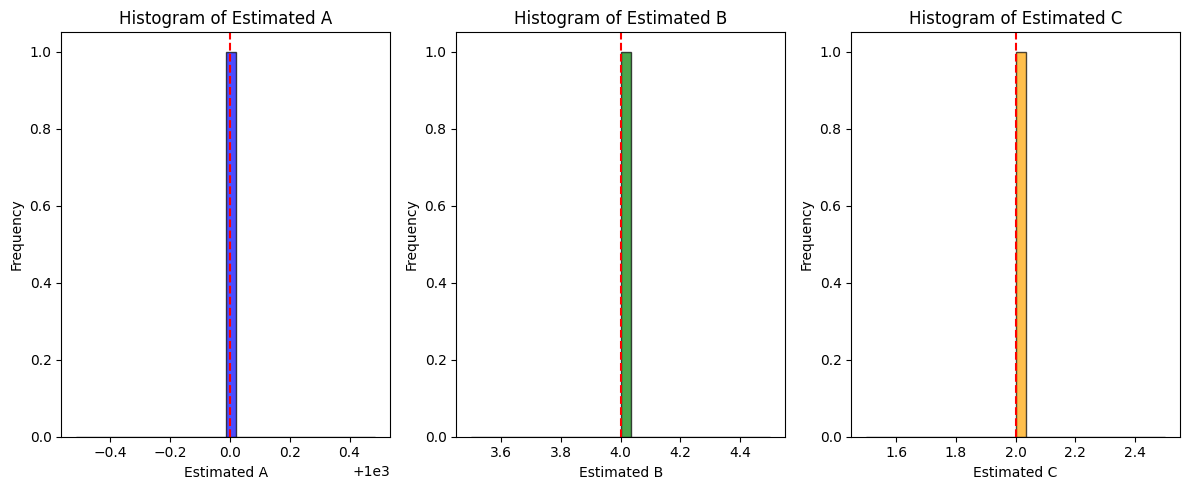

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def generate_data(N, lambda_rate, true_params):
    """
    Generate synthetic data for the polynomial model.

    N: Number of observations
    lambda_rate: Rate parameter for the exponential distribution
    true_params: Tuple of true parameters (A, B, C)

    Returns:
    t: Time series array
    x: Observed data array
    """
    # True parameters
    A_true, B_true, C_true = true_params

    # Generate time series with exponential tau
    tau = np.random.exponential(scale=1/lambda_rate, size=N-1)
    t = np.cumsum(np.concatenate(([0], tau)))  # Include initial time t[0]=0

    # Generate observations
    noise = np.random.normal(0, np.sqrt(5), N)
    x = A_true + B_true * t + C_true * t**2 + noise

    return t, x

def fisher_information_matrix_poly(H, sigma2):
    """
    Compute the Fisher Information Matrix (FIM) for a polynomial model.

    H: Observation matrix (N x p)
    sigma2: Variance of the noise (scalar)

    Returns:
    FIM: Fisher Information Matrix (p x p)
    """
    return (H.T @ H) / sigma2

def gradient_log_likelihood_poly(theta, H, x, sigma2):
    """
    Compute the gradient of the log-likelihood function with respect to theta for a polynomial model.

    theta: Parameter vector (p x 1)
    H: Observation matrix (N x p)
    x: Observed data vector (N x 1)
    sigma2: Variance of the noise (scalar)

    Returns:
    grad_log_likelihood: Gradient of the log-likelihood function (p x 1)
    """
    residual = x - H @ theta
    grad_log_likelihood = - (1 / sigma2) * H.T @ residual
    return grad_log_likelihood.reshape(-1, 1)  # Ensure it is a (p, 1) array

def theta_hat_poly(x, H, sigma2):
    """
    Compute the theta_hat(x) using Fisher-Rao factorization for a polynomial model.

    x: Observed data vector (N x 1)
    H: Observation matrix (N x p)
    sigma2: Variance of the noise (scalar)

    Returns:
    theta_hat: Estimated parameters (p x 1)
    """
    # Compute FIM
    FIM = fisher_information_matrix_poly(H, sigma2)

    # Compute MVUE estimate
    H_T_H_inv = np.linalg.inv(H.T @ H)
    theta_mv = H_T_H_inv @ H.T @ x

    # Compute gradient of log-likelihood
    grad_log_likelihood = gradient_log_likelihood_poly(theta_mv, H, x, sigma2)

    # Compute theta_hat(x) using Fisher-Rao factorization
    theta_hat = theta_mv + np.linalg.inv(FIM) @ grad_log_likelihood

    return theta_hat

# Parameters
N = 100000  # Number of observations
lambda_rate = 2.0  # Rate parameter for exponential distribution
true_params = (1000, 4, 2)  # True values for A, B, C
sigma2 = 5  # Variance of the noise

# Generate synthetic data
t, x = generate_data(N, lambda_rate, true_params)

# Observation matrix H for the polynomial model
H = np.vstack((np.ones(N), t, t**2)).T
print(H)

# Convert x to a column vector
x = x.reshape(-1, 1)

# Apply the theta_hat(x) estimator
theta_hat_estimate = theta_hat_poly(x, H, sigma2)
print(theta_hat_estimate)

# Extract the estimated parameters A, B, and C
A_hat, B_hat, C_hat = theta_hat_estimate.flatten()

# Display the results
print(f"Estimated parameters (theta_hat(x)):")
print(f"A: {A_hat}")
print(f"B: {B_hat}")
print(f"C: {C_hat}")

# Plot histograms of parameter estimates
plt.figure(figsize=(12, 5))

# Histogram for A
plt.subplot(1, 3, 1)
plt.hist(A_hat, bins=30, alpha=0.7, color='blue', edgecolor='black')
plt.axvline(true_params[0], color='red', linestyle='dashed', linewidth=1.5)
plt.title('Histogram of Estimated A')
plt.xlabel('Estimated A')
plt.ylabel('Frequency')

# Histogram for B
plt.subplot(1, 3, 2)
plt.hist(B_hat, bins=30, alpha=0.7, color='green', edgecolor='black')
plt.axvline(true_params[1], color='red', linestyle='dashed', linewidth=1.5)
plt.title('Histogram of Estimated B')
plt.xlabel('Estimated B')
plt.ylabel('Frequency')

# Histogram for C
plt.subplot(1, 3, 3)
plt.hist(C_hat, bins=30, alpha=0.7, color='orange', edgecolor='black')
plt.axvline(true_params[2], color='red', linestyle='dashed', linewidth=1.5)
plt.title('Histogram of Estimated C')
plt.xlabel('Estimated C')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()




Polynomial fitting 1000 iterations

Mean estimated parameters (theta_hat(x)) across 1000 iterations:
A: 1000.0005281428374
B: 3.9999999708331737
C: 1.9999999999999076


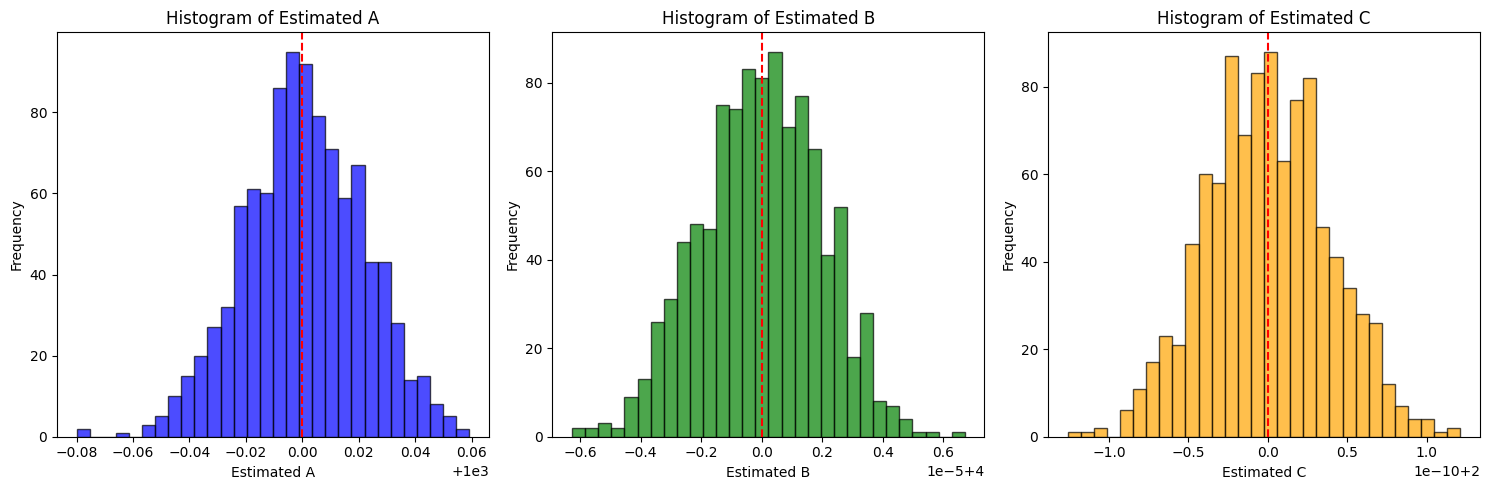

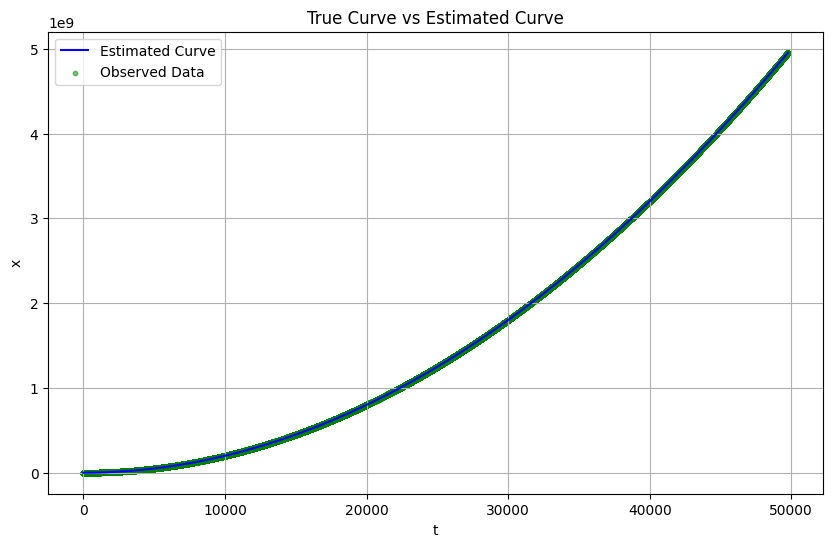

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def generate_data(N, lambda_rate, true_params):
    """
    Generate synthetic data for the polynomial model.

    N: Number of observations
    lambda_rate: Rate parameter for the exponential distribution
    true_params: Tuple of true parameters (A, B, C)

    Returns:
    t: Time series array
    x: Observed data array
    """
    # True parameters
    A_true, B_true, C_true = true_params

    # Generate time series with exponential tau
    tau = np.random.exponential(scale=1/lambda_rate, size=N-1)
    t = np.cumsum(np.concatenate(([0], tau)))  # Include initial time t[0]=0

    # Generate observations
    noise = np.random.normal(0, np.sqrt(5), N)
    x = A_true + B_true * t + C_true * t**2 + noise

    return t, x

def fisher_information_matrix_poly(H, sigma2):
    """
    Compute the Fisher Information Matrix (FIM) for a polynomial model.

    H: Observation matrix (N x p)
    sigma2: Variance of the noise (scalar)

    Returns:
    FIM: Fisher Information Matrix (p x p)
    """
    return (H.T @ H) / sigma2

def gradient_log_likelihood_poly(theta, H, x, sigma2):
    """
    Compute the gradient of the log-likelihood function with respect to theta for a polynomial model.

    theta: Parameter vector (p x 1)
    H: Observation matrix (N x p)
    x: Observed data vector (N x 1)
    sigma2: Variance of the noise (scalar)

    Returns:
    grad_log_likelihood: Gradient of the log-likelihood function (p x 1)
    """
    residual = x - H @ theta
    grad_log_likelihood = - (1 / sigma2) * H.T @ residual
    return grad_log_likelihood.reshape(-1, 1)  # Ensure it is a (p, 1) array

def theta_hat_poly(x, H, sigma2):
    """
    Compute the theta_hat(x) using Fisher-Rao factorization for a polynomial model.

    x: Observed data vector (N x 1)
    H: Observation matrix (N x p)
    sigma2: Variance of the noise (scalar)

    Returns:
    theta_hat: Estimated parameters (p x 1)
    """
    # Compute FIM
    FIM = fisher_information_matrix_poly(H, sigma2)

    # Compute MVUE estimate
    H_T_H_inv = np.linalg.inv(H.T @ H)
    theta_mv = H_T_H_inv @ H.T @ x

    # Compute gradient of log-likelihood
    grad_log_likelihood = gradient_log_likelihood_poly(theta_mv, H, x, sigma2)

    # Compute theta_hat(x) using Fisher-Rao factorization
    theta_hat = theta_mv + np.linalg.inv(FIM) @ grad_log_likelihood

    return theta_hat

def run_estimations(num_iterations, N, lambda_rate, true_params, sigma2):
    """
    Run multiple iterations of parameter estimation and average the results.

    num_iterations: Number of iterations to run
    N: Number of observations
    lambda_rate: Rate parameter for the exponential distribution
    true_params: Tuple of true parameters (A, B, C)
    sigma2: Variance of the noise (scalar)

    Returns:
    mean_estimates: Mean of the estimated parameters across all iterations
    all_estimates: List of estimated parameters from all iterations
    """
    all_estimates = []

    for _ in range(num_iterations):
        # Generate synthetic data
        t, x = generate_data(N, lambda_rate, true_params)

        # Observation matrix H for the polynomial model
        H = np.vstack((np.ones(N), t, t**2)).T

        # Convert x to a column vector
        x = x.reshape(-1, 1)

        # Apply the theta_hat(x) estimator
        theta_hat_estimate = theta_hat_poly(x, H, sigma2)

        all_estimates.append(theta_hat_estimate.flatten())

    # Convert all estimates to a numpy array
    all_estimates = np.array(all_estimates)

    # Compute the mean of estimates
    mean_estimates = np.mean(all_estimates, axis=0)

    return mean_estimates, all_estimates

# Parameters
N = 100000  # Number of observations
lambda_rate = 2.0  # Rate parameter for exponential distribution
true_params = (1000, 4, 2)  # True values for A, B, C
sigma2 = 5  # Variance of the noise
num_iterations = 1000  # Number of iterations

# Run estimations
mean_estimates, all_estimates = run_estimations(num_iterations, N, lambda_rate, true_params, sigma2)

# Extract the mean estimated parameters A, B, and C
A_mean, B_mean, C_mean = mean_estimates

# Display the results
print(f"Mean estimated parameters (theta_hat(x)) across {num_iterations} iterations:")
print(f"A: {A_mean}")
print(f"B: {B_mean}")
print(f"C: {C_mean}")

# Plot histograms of parameter estimates
plt.figure(figsize=(15, 5))

# Histogram for A
plt.subplot(1, 3, 1)
plt.hist(all_estimates[:, 0], bins=30, alpha=0.7, color='blue', edgecolor='black')
plt.axvline(true_params[0], color='red', linestyle='dashed', linewidth=1.5)
plt.title('Histogram of Estimated A')
plt.xlabel('Estimated A')
plt.ylabel('Frequency')

# Histogram for B
plt.subplot(1, 3, 2)
plt.hist(all_estimates[:, 1], bins=30, alpha=0.7, color='green', edgecolor='black')
plt.axvline(true_params[1], color='red', linestyle='dashed', linewidth=1.5)
plt.title('Histogram of Estimated B')
plt.xlabel('Estimated B')
plt.ylabel('Frequency')

# Histogram for C
plt.subplot(1, 3, 3)
plt.hist(all_estimates[:, 2], bins=30, alpha=0.7, color='orange', edgecolor='black')
plt.axvline(true_params[2], color='red', linestyle='dashed', linewidth=1.5)
plt.title('Histogram of Estimated C')
plt.xlabel('Estimated C')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


t_plot = np.linspace(0, np.max(np.cumsum(np.random.exponential(scale=1/lambda_rate, size=N-1))), N)

# Generate the true and estimated curves
x_true_curve = true_params[0] + true_params[1] * t_plot + true_params[2] * t_plot**2
x_estimated_curve = A_mean + B_mean * t_plot + C_mean * t_plot**2

# Plot true curve vs estimated curve
plt.figure(figsize=(10, 6))
# plt.plot(t_plot, x_true_curve, color='red', linestyle='--', label='True Curve')
plt.plot(t_plot, x_estimated_curve, color='blue', linestyle='-', label='Estimated Curve')
plt.scatter(t_plot, x_true_curve, color='green', alpha=0.5, s=10, label='Observed Data')
plt.xlabel('t')
plt.ylabel('x')
plt.title('True Curve vs Estimated Curve')
plt.legend()
plt.grid(True)
plt.show()

Comparison of max and mean estimators for DC with Gaussian and DC with parameter dependent uniform noise
lambda = 100

[1000.00028203]
1021.9170291934581
[999.99649806 100.14127384]
[1099.99808303  199.9960958 ]
Gaussian Noise - Mean estimated parameter A across 1000 iterations:
A (mean): 1000.0002820296115
A (max): 1021.9170291934581
Uniform Noise - Mean estimated parameters across 1000 iterations:
A (mean): 999.9964980590261
A (max): 1099.998083027965
lambda (mean): 100.14127384144774
lambda (max): 199.99609580289152
Estimation Error (A_gaussian) using mean estimator: 0.00028202961152601347
Estimation Error (A_gaussian) using max estimator: 21.91702919345812
Estimation Error (A_uniform) using mean estimator: -0.003501940973933415
Estimation Error (lambda_uniform) using mean estimator: 0.1412738414477417
Estimation Error (A_uniform) using max estimator: 99.9980830279651
Estimation Error (lambda_uniform) using max estimator: 99.99609580289152


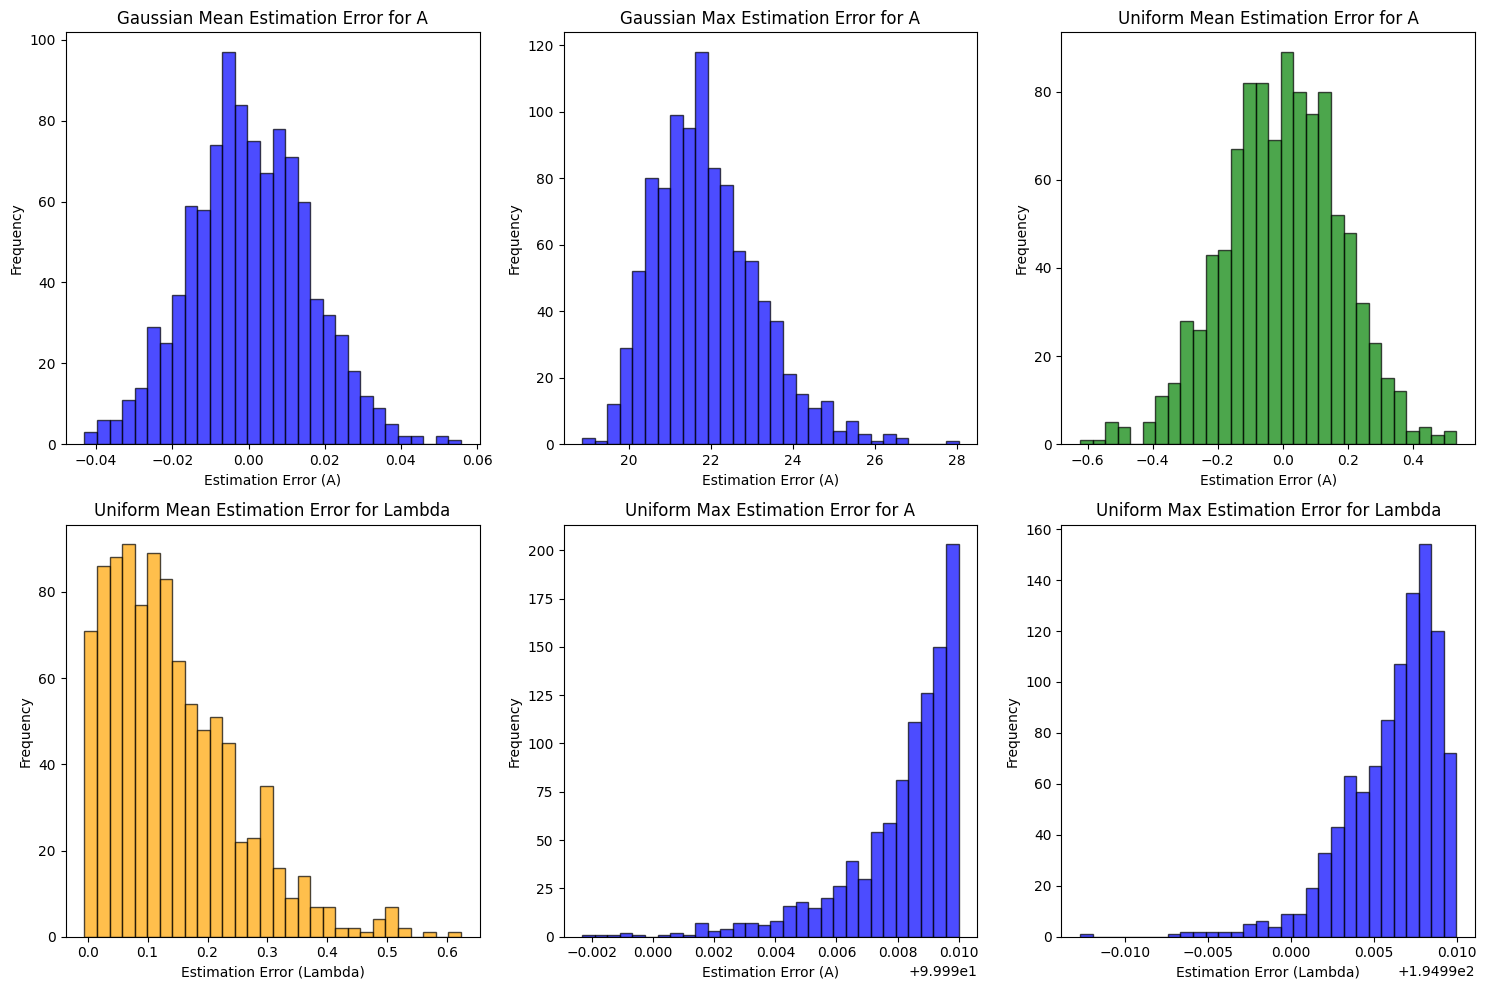

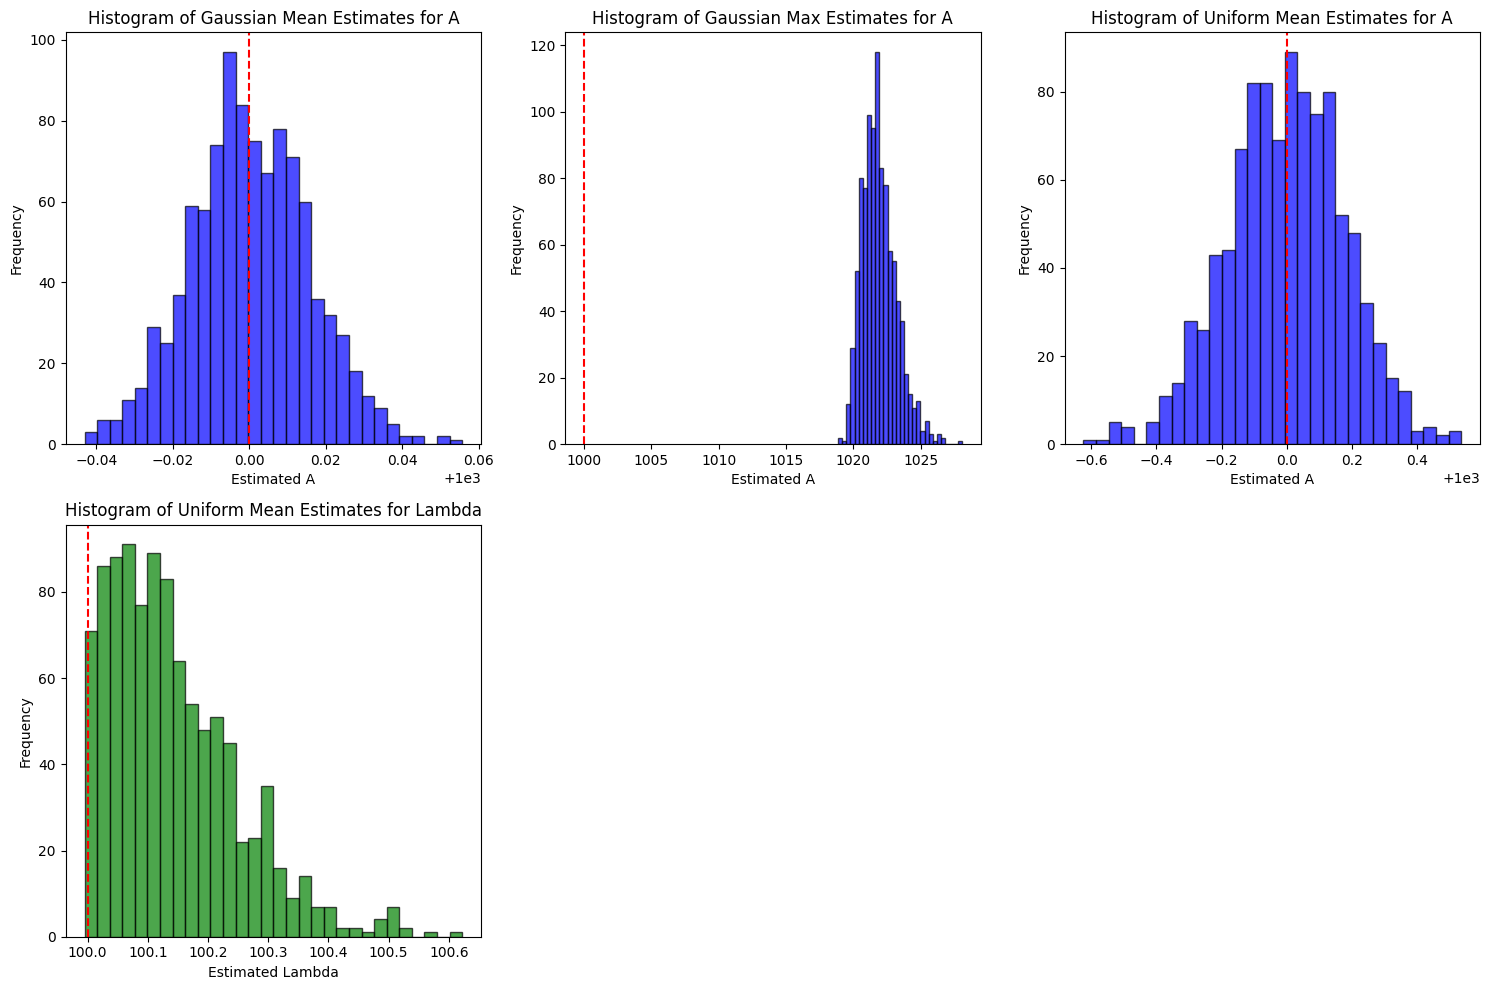

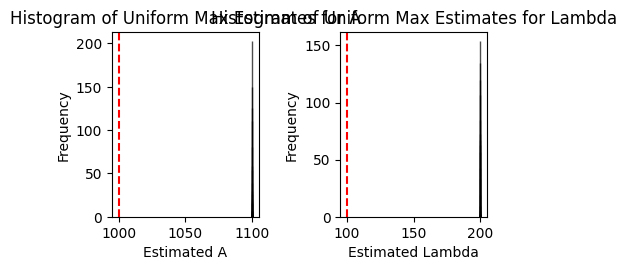

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def generate_data_gaussian(N, A, sigma):
    """
    Generate synthetic data with Gaussian noise.

    N: Number of observations
    A: True parameter A
    sigma: Standard deviation of Gaussian noise

    Returns:
    x: Observed data array
    """
    noise = np.random.normal(0, sigma, N)
    x = A + noise
    return x

def generate_data_uniform(N, A, lambda_param):
    """
    Generate synthetic data with uniform noise.

    N: Number of observations
    A: True parameter A
    lambda_param: Parameter defining the range of uniform noise

    Returns:
    x: Observed data array
    """
    noise = np.random.uniform(-lambda_param, lambda_param, N)
    x = A + noise
    return x

def fisher_information_matrix_gaussian(N, sigma):
    """
    Compute the Fisher Information Matrix (FIM) for Gaussian noise.

    N: Number of observations
    sigma: Standard deviation of Gaussian noise

    Returns:
    FIM: Fisher Information Matrix (1 x 1)
    """
    return np.array([[1 / sigma**2]])

def fisher_information_matrix_uniform(N, lambda_param):
    """
    Compute the Fisher Information Matrix (FIM) for uniform noise.

    N: Number of observations
    lambda_param: Parameter defining the range of uniform noise

    Returns:
    FIM: Fisher Information Matrix (2 x 2)
    """
    return np.array([[1 / N, 0],
                     [0, 12 / (N * lambda_param**2)]])

def estimate_parameters_gaussian(x, sigma):
    """
    Estimate parameter A for Gaussian noise using Fisher-Rao factorization.

    x: Observed data vector (N x 1)
    sigma: Standard deviation of Gaussian noise

    Returns:
    A_hat: Estimated parameter A
    """
    # Fisher Information Matrix
    FIM = fisher_information_matrix_gaussian(len(x), sigma)

    # Estimate A
    A_hat_mean = np.mean(x)
    A_hat_max = np.max(x)

    return A_hat_mean, A_hat_max

def estimate_parameters_uniform(x, lambda_param):
    """
    Estimate parameters A and lambda for uniform noise using Fisher-Rao factorization.

    x: Observed data vector (N x 1)
    lambda_param: Parameter defining the range of uniform noise

    Returns:
    A_hat: Estimated parameter A
    lambda_hat: Estimated parameter lambda
    """
    # Fisher Information Matrix
    FIM = fisher_information_matrix_uniform(len(x), lambda_param)

    # Estimate A
    A_hat_mean = np.mean(x)
    lambda_hat_mean = np.max(np.abs(x - A_hat_mean))

    A_hat_max = np.max(x)
    lambda_hat_max = np.max(np.abs(x - A_hat_max))

    return A_hat_mean, lambda_hat_mean, A_hat_max, lambda_hat_max

def run_estimations(num_iterations, N, true_params, noise_type, noise_param):
    """
    Run multiple iterations of parameter estimation and average the results.

    num_iterations: Number of iterations to run
    N: Number of observations
    true_params: Tuple of true parameters (A, lambda) for uniform noise
    noise_type: Type of noise ('gaussian' or 'uniform')
    noise_param: Parameter for noise (sigma for Gaussian noise, lambda for Uniform noise)

    Returns:
    mean_estimates: Mean of the estimated parameters across all iterations
    max_estimates: Mean of the max of estimates across all iterations
    all_estimates: List of estimated parameters from all iterations
    final_estimates: Estimates from the final iteration
    """
    all_estimates = []
    max_estimates = []

    for i in range(num_iterations):
        # Generate synthetic data
        if noise_type == 'gaussian':
            A_true, sigma = true_params
            x = generate_data_gaussian(N, A_true, sigma)
            A_hat_mean, A_hat_max = estimate_parameters_gaussian(x, sigma)
            all_estimates.append([A_hat_mean])
            max_estimates.append(A_hat_max)
            if i == num_iterations - 1:
                final_estimates = [A_hat_mean, A_hat_max]
        elif noise_type == 'uniform':
            A_true, lambda_param = true_params
            x = generate_data_uniform(N, A_true, lambda_param)
            A_hat_mean, lambda_hat_mean, A_hat_max, lambda_hat_max = estimate_parameters_uniform(x, lambda_param)
            all_estimates.append([A_hat_mean, lambda_hat_mean])
            max_estimates.append([A_hat_max, lambda_hat_max])
            if i == num_iterations - 1:
                final_estimates = [A_hat_mean, lambda_hat_mean, A_hat_max, lambda_hat_max]
            # print(f"Iteration {i+1}: A_hat_mean = {A_hat_mean}, lambda_hat_mean = {lambda_hat_mean}, A_hat_max = {A_hat_max}, lambda_hat_max = {lambda_hat_max}")
        else:
            raise ValueError("Invalid noise type. Use 'gaussian' or 'uniform'.")

    # Convert all estimates to a numpy array
    all_estimates = np.array(all_estimates)
    max_estimates = np.array(max_estimates)

    # Compute the mean of all estimates
    mean_estimates = np.mean(all_estimates, axis=0)

    # Compute the mean of max estimates
    mean_max_estimates = np.mean(max_estimates, axis=0)

    return mean_estimates, mean_max_estimates, all_estimates, max_estimates, final_estimates


# def compute_metrics(true_values, estimates):
#     bias = np.mean(estimates, axis=0) - true_values
#     mse = np.mean((estimates - true_values) ** 2, axis=0)
#     variance = np.var(estimates, axis=0)

#     return mse, variance, bias
# Parameters
N = 10**5  # Number of observations
true_params_gaussian = (1000, 5)  # True value for A, sigma for Gaussian noise
true_params_uniform = (1000, 100)  # True value for A, lambda for Uniform noise
num_iterations = 1000  # Number of iterations

# Run estimations for Gaussian noise
mean_estimates_gaussian, mean_max_estimates_gaussian, all_estimates_gaussian, max_estimates_gaussian, final_estimates_gaussian = run_estimations(
    num_iterations, N, true_params_gaussian, 'gaussian', true_params_gaussian[1])
print(mean_estimates_gaussian)
print(mean_max_estimates_gaussian)
# Run estimations for Uniform noise
mean_estimates_uniform, mean_max_estimates_uniform, all_estimates_uniform, max_estimates_uniform, final_estimates_uniform = run_estimations(
    num_iterations, N, true_params_uniform, 'uniform', true_params_uniform[1])
print(mean_estimates_uniform)
print(mean_max_estimates_uniform)

A_mean_gaussian = mean_estimates_gaussian[0]
A_max_gaussian = mean_max_estimates_gaussian
A_mean_uniform, lambda_mean_uniform = mean_estimates_uniform

A_max_uniform, lambda_max_uniform = mean_max_estimates_uniform

# Display the results
print(f"Gaussian Noise - Mean estimated parameter A across {num_iterations} iterations:")
print(f"A (mean): {A_mean_gaussian}")
print(f"A (max): {A_max_gaussian}")

print(f"Uniform Noise - Mean estimated parameters across {num_iterations} iterations:")
print(f"A (mean): {A_mean_uniform}")
print(f"A (max): {A_max_uniform}")
print(f"lambda (mean): {lambda_mean_uniform}")
print(f"lambda (max): {lambda_max_uniform}")

true_A_gaussian = true_params_gaussian[0]
final_A_gaussian_mean =A_mean_gaussian
error_final_A_gaussian_mean = final_A_gaussian_mean - true_A_gaussian
print(f"Estimation Error (A_gaussian) using mean estimator: {error_final_A_gaussian_mean}")

true_A_gaussian = true_params_gaussian[0]
final_A_gaussian_max = A_max_gaussian
error_final_A_gaussian_max = final_A_gaussian_max - true_A_gaussian
print(f"Estimation Error (A_gaussian) using max estimator: {error_final_A_gaussian_max}")


true_A_uniform = true_params_uniform[0]
final_A_uniform_mean = A_mean_uniform
error_final_A_uniform_mean = final_A_uniform_mean - true_A_uniform

print(f"Estimation Error (A_uniform) using mean estimator: {error_final_A_uniform_mean}")

true_lambda_uniform = true_params_uniform[1]
final_lambda_uniform_mean = lambda_mean_uniform
error_final_lambda_uniform_mean = final_lambda_uniform_mean - true_lambda_uniform

print(f"Estimation Error (lambda_uniform) using mean estimator: {error_final_lambda_uniform_mean}")


true_A_uniform = true_params_uniform[0]
final_A_uniform_max = A_max_uniform
error_final_A_uniform_max = final_A_uniform_max - true_A_uniform
print(f"Estimation Error (A_uniform) using max estimator: {error_final_A_uniform_max}")


true_lambda_uniform = true_params_uniform[1]
final_lambda_uniform_max = lambda_max_uniform
error_final_lambda_uniform_max = final_lambda_uniform_max - true_lambda_uniform

print(f"Estimation Error (lambda_uniform) using max estimator: {error_final_lambda_uniform_max}")


# true_params_uniform_arr = np.array([true_params_uniform[0], true_params_uniform[1]])
# final_A_uniform = np.array([final_estimates_uniform[0]])
# final_lambda_uniform = np.array([final_estimates_uniform[1]])
# error_final_A_uniform = final_A_uniform - true_params_uniform_arr[0]
# error_final_lambda_uniform = final_lambda_uniform - true_params_uniform_arr[1]

# print(f"\nFinal Iteration Errors for Gaussian Noise:")
# print(f"Estimation Error (A) in final iteration: {error_final_A_gaussian[0]}")

# print(f"\nFinal Iteration Errors for Uniform Noise:")
# print(f"Estimation Error (A) in final iteration: {error_final_A_uniform[0]}")
# print(f"Estimation Error (Lambda) in final iteration: {error_final_lambda_uniform[0]}")

# Plot histograms of estimation error for mean and max
plt.figure(figsize=(15, 10))

# Histogram for Gaussian Mean A estimation error
plt.subplot(2, 3, 1)
plt.hist(all_estimates_gaussian[:, 0] - true_params_gaussian[0], bins=30, alpha=0.7, color='blue', edgecolor='black')
plt.title('Gaussian Mean Estimation Error for A')
plt.xlabel('Estimation Error (A)')
plt.ylabel('Frequency')

# Histogram for Gaussian Max A estimation error
plt.subplot(2, 3, 2)
plt.hist(max_estimates_gaussian[:] - true_params_gaussian[0], bins=30, alpha=0.7, color='blue', edgecolor='black')
plt.title('Gaussian Max Estimation Error for A')
plt.xlabel('Estimation Error (A)')
plt.ylabel('Frequency')

# Histogram for Uniform Mean A estimation error
plt.subplot(2, 3, 3)
plt.hist(all_estimates_uniform[:, 0] - true_params_uniform[0], bins=30, alpha=0.7, color='green', edgecolor='black')
plt.title('Uniform Mean Estimation Error for A')
plt.xlabel('Estimation Error (A)')
plt.ylabel('Frequency')

# Histogram for Uniform Lambda Mean estimation error
plt.subplot(2, 3, 4)
plt.hist(all_estimates_uniform[:, 1] - true_params_uniform[1], bins=30, alpha=0.7, color='orange', edgecolor='black')
plt.title('Uniform Mean Estimation Error for Lambda')
plt.xlabel('Estimation Error (Lambda)')
plt.ylabel('Frequency')

# Histogram for Uniform Max A estimation error
plt.subplot(2, 3, 5)
plt.hist(max_estimates_uniform[:, 0] - true_params_gaussian[0], bins=30, alpha=0.7, color='blue', edgecolor='black')
plt.title('Uniform Max Estimation Error for A')
plt.xlabel('Estimation Error (A)')
plt.ylabel('Frequency')

# Histogram for Uniform Lambda Max estimation error
plt.subplot(2, 3, 6)
plt.hist(max_estimates_uniform[:, 1] - true_params_gaussian[1], bins=30, alpha=0.7, color='blue', edgecolor='black')
plt.title('Uniform Max Estimation Error for Lambda')
plt.xlabel('Estimation Error (Lambda)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Plot histograms of parameter estimates
plt.figure(figsize=(15, 10))

# Histogram for Gaussian Mean Estimates
plt.subplot(2, 3, 1)
plt.hist(all_estimates_gaussian[:, 0], bins=30, alpha=0.7, color='blue', edgecolor='black')
plt.axvline(true_params_gaussian[0], color='red', linestyle='dashed', linewidth=1.5)
plt.title('Histogram of Gaussian Mean Estimates for A')
plt.xlabel('Estimated A')
plt.ylabel('Frequency')

# Histogram for Gaussian Max Estimates
plt.subplot(2, 3, 2)
plt.hist(max_estimates_gaussian[:], bins=30, alpha=0.7, color='blue', edgecolor='black')
plt.axvline(true_params_gaussian[0], color='red', linestyle='dashed', linewidth=1.5)
plt.title('Histogram of Gaussian Max Estimates for A')
plt.xlabel('Estimated A')
plt.ylabel('Frequency')

# Histogram for Uniform Mean Estimates
plt.subplot(2, 3, 3)
plt.hist(all_estimates_uniform[:, 0], bins=30, alpha=0.7, color='blue', edgecolor='black')
plt.axvline(true_params_uniform[0], color='red', linestyle='dashed', linewidth=1.5)
plt.title('Histogram of Uniform Mean Estimates for A')
plt.xlabel('Estimated A')
plt.ylabel('Frequency')

# Histogram for Uniform Lambda Mean Estimates
plt.subplot(2, 3, 4)
plt.hist(all_estimates_uniform[:, 1], bins=30, alpha=0.7, color='green', edgecolor='black')
plt.axvline(true_params_uniform[1], color='red', linestyle='dashed', linewidth=1.5)
plt.title('Histogram of Uniform Mean Estimates for Lambda')
plt.xlabel('Estimated Lambda')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Histogram for Uniform Max Estimates
plt.subplot(2, 3, 5)
plt.hist(max_estimates_uniform[:, 0], bins=30, alpha=0.7, color='blue', edgecolor='black')
plt.axvline(true_params_uniform[0], color='red', linestyle='dashed', linewidth=1.5)
plt.title('Histogram of Uniform Max Estimates for A')
plt.xlabel('Estimated A')
plt.ylabel('Frequency')

# Histogram for Uniform Lambda Max Estimates
plt.subplot(2, 3, 6)
plt.hist(max_estimates_uniform[:, 1], bins=30, alpha=0.7, color='green', edgecolor='black')
plt.axvline(true_params_uniform[1], color='red', linestyle='dashed', linewidth=1.5)
plt.title('Histogram of Uniform Max Estimates for Lambda')
plt.xlabel('Estimated Lambda')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()




Comparison of max and mean estimators for DC with Gaussian and DC with parameter dependent uniform noise
lambda = 2

[999.9997]
1021.9031116062852
[999.99999214   2.00277878]
[1001.99996206    3.99991775]
Gaussian Noise - Mean estimated parameter A across 1000 iterations:
A (mean): 999.9997000026772
A (max): 1021.9031116062852
Uniform Noise - Mean estimated parameters across 1000 iterations:
A (mean): 999.9999921401776
A (max): 1001.9999620596844
lambda (mean): 2.0027787781330897
lambda (max): 3.9999177508769885
Estimation Error (A_gaussian) using mean estimator: -0.00029999732282703917
Estimation Error (A_gaussian) using max estimator: 21.903111606285165
Estimation Error (A_uniform) using mean estimator: -7.859822403588623e-06
Estimation Error (lambda_uniform) using mean estimator: 0.0027787781330896877
Estimation Error (A_uniform) using max estimator: 1.9999620596844352
Estimation Error (lambda_uniform) using max estimator: 1.9999177508769885


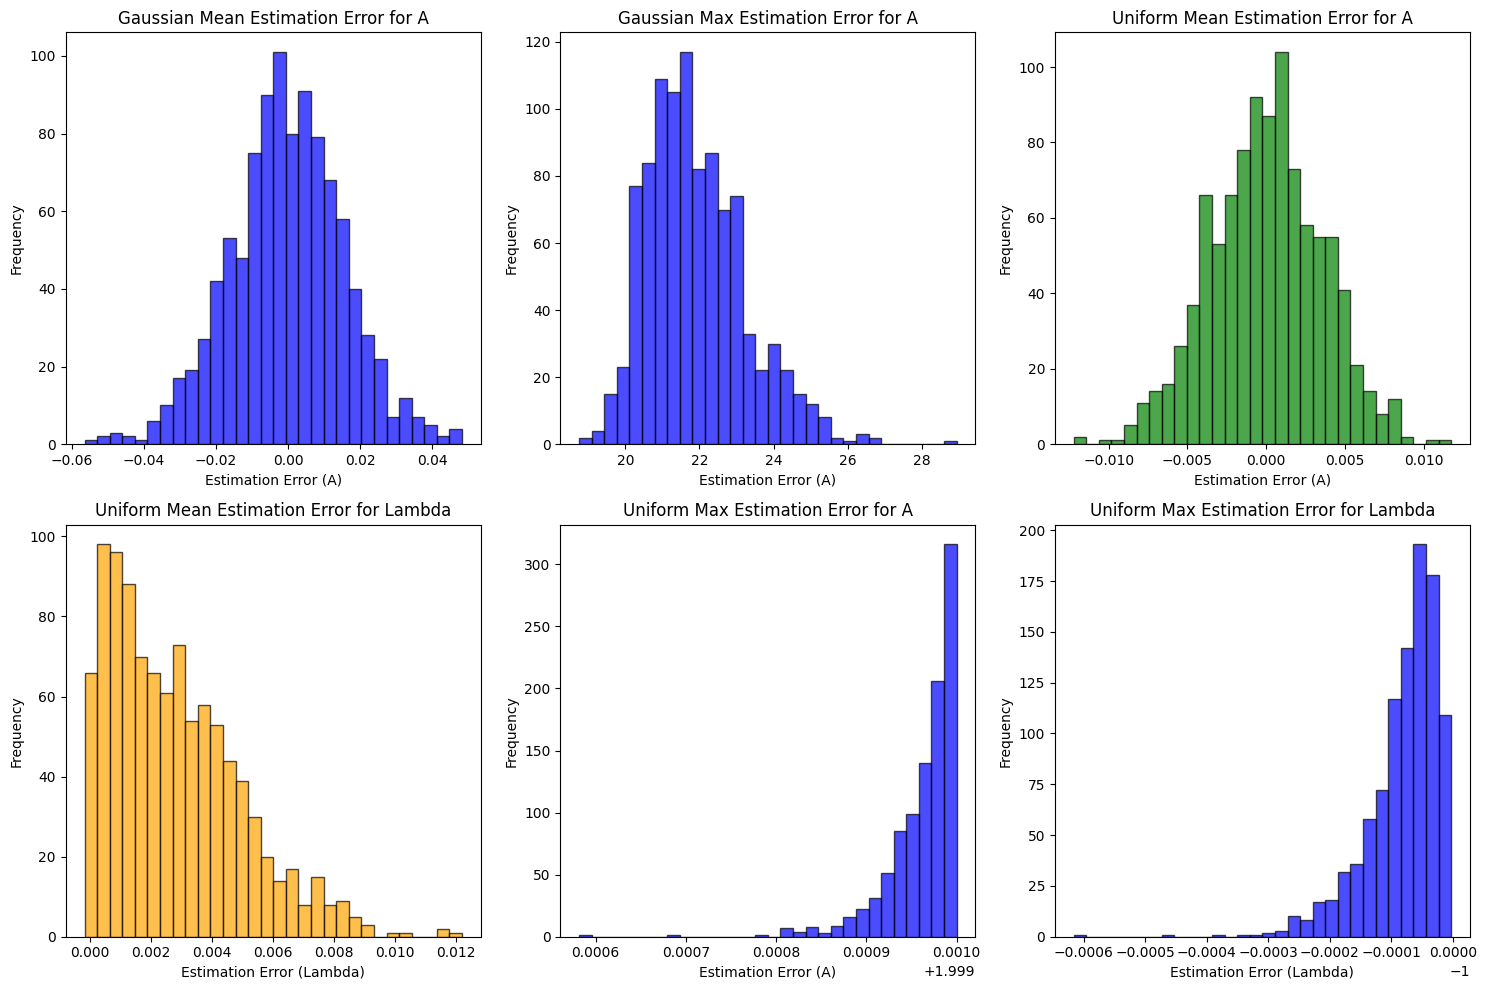

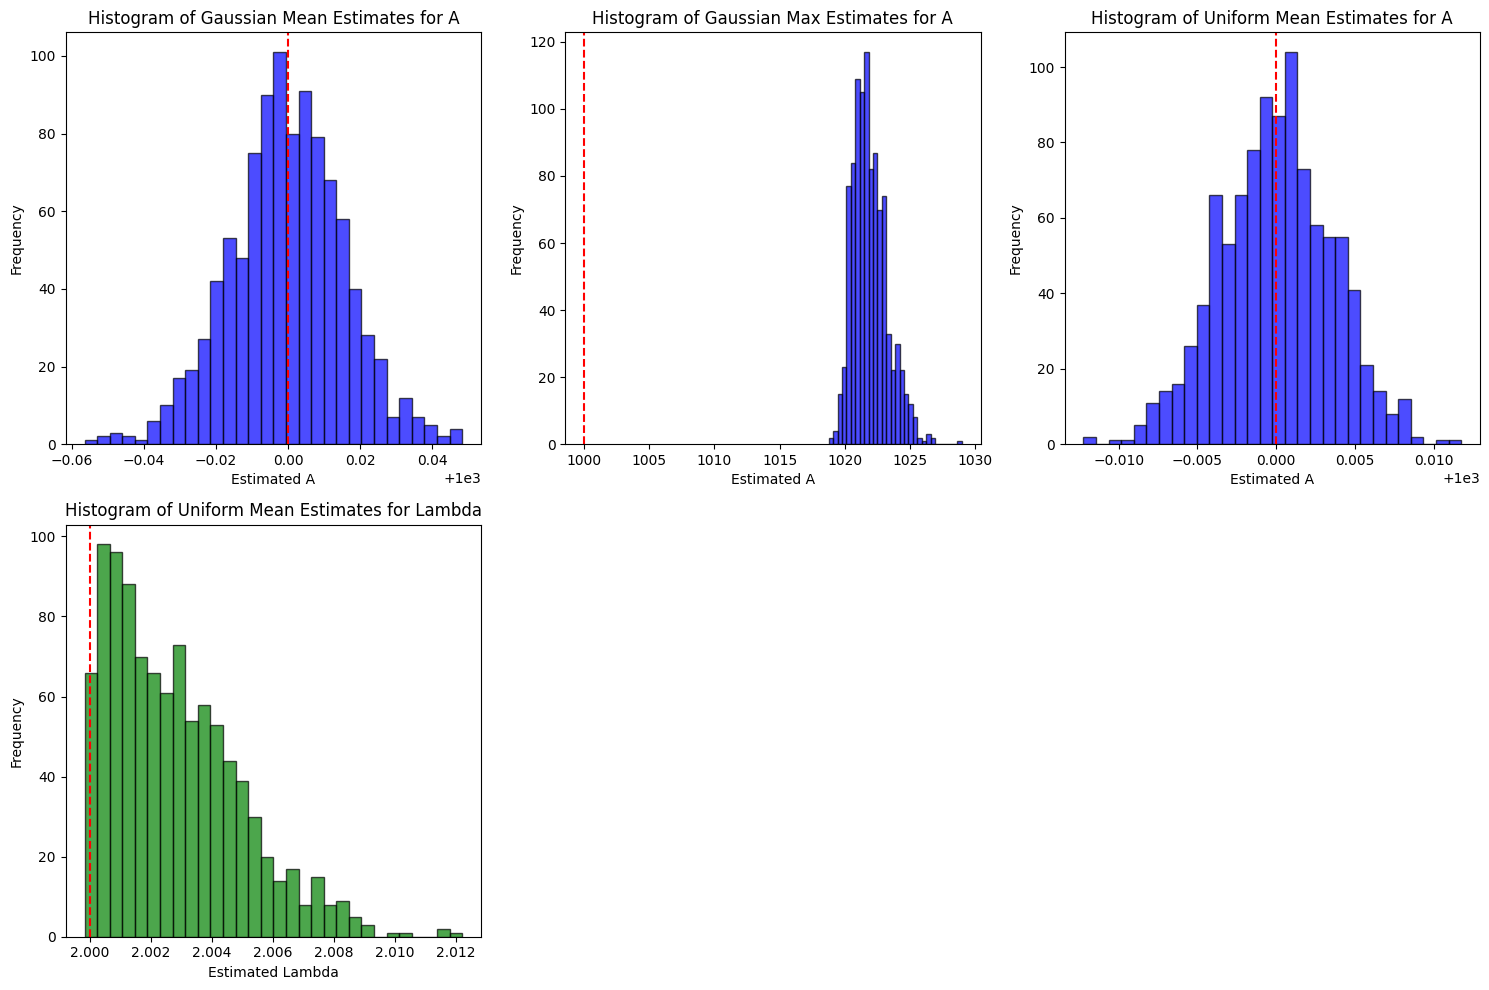

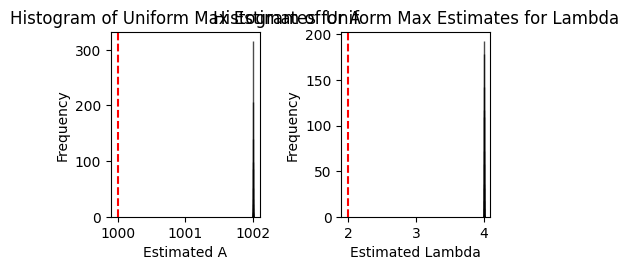

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def generate_data_gaussian(N, A, sigma):
    """
    Generate synthetic data with Gaussian noise.

    N: Number of observations
    A: True parameter A
    sigma: Standard deviation of Gaussian noise

    Returns:
    x: Observed data array
    """
    noise = np.random.normal(0, sigma, N)
    x = A + noise
    return x

def generate_data_uniform(N, A, lambda_param):
    """
    Generate synthetic data with uniform noise.

    N: Number of observations
    A: True parameter A
    lambda_param: Parameter defining the range of uniform noise

    Returns:
    x: Observed data array
    """
    noise = np.random.uniform(-lambda_param, lambda_param, N)
    x = A + noise
    return x

def fisher_information_matrix_gaussian(N, sigma):
    """
    Compute the Fisher Information Matrix (FIM) for Gaussian noise.

    N: Number of observations
    sigma: Standard deviation of Gaussian noise

    Returns:
    FIM: Fisher Information Matrix (1 x 1)
    """
    return np.array([[1 / sigma**2]])

def fisher_information_matrix_uniform(N, lambda_param):
    """
    Compute the Fisher Information Matrix (FIM) for uniform noise.

    N: Number of observations
    lambda_param: Parameter defining the range of uniform noise

    Returns:
    FIM: Fisher Information Matrix (2 x 2)
    """
    return np.array([[1 / N, 0],
                     [0, 12 / (N * lambda_param**2)]])

def estimate_parameters_gaussian(x, sigma):
    """
    Estimate parameter A for Gaussian noise using Fisher-Rao factorization.

    x: Observed data vector (N x 1)
    sigma: Standard deviation of Gaussian noise

    Returns:
    A_hat: Estimated parameter A
    """
    # Fisher Information Matrix
    FIM = fisher_information_matrix_gaussian(len(x), sigma)

    # Estimate A
    A_hat_mean = np.mean(x)
    A_hat_max = np.max(x)

    return A_hat_mean, A_hat_max

def estimate_parameters_uniform(x, lambda_param):
    """
    Estimate parameters A and lambda for uniform noise using Fisher-Rao factorization.

    x: Observed data vector (N x 1)
    lambda_param: Parameter defining the range of uniform noise

    Returns:
    A_hat: Estimated parameter A
    lambda_hat: Estimated parameter lambda
    """
    # Fisher Information Matrix
    FIM = fisher_information_matrix_uniform(len(x), lambda_param)

    # Estimate A
    A_hat_mean = np.mean(x)
    lambda_hat_mean = np.max(np.abs(x - A_hat_mean))

    A_hat_max = np.max(x)
    lambda_hat_max = np.max(np.abs(x - A_hat_max))

    return A_hat_mean, lambda_hat_mean, A_hat_max, lambda_hat_max

def run_estimations(num_iterations, N, true_params, noise_type, noise_param):
    """
    Run multiple iterations of parameter estimation and average the results.

    num_iterations: Number of iterations to run
    N: Number of observations
    true_params: Tuple of true parameters (A, lambda) for uniform noise
    noise_type: Type of noise ('gaussian' or 'uniform')
    noise_param: Parameter for noise (sigma for Gaussian noise, lambda for Uniform noise)

    Returns:
    mean_estimates: Mean of the estimated parameters across all iterations
    max_estimates: Mean of the max of estimates across all iterations
    all_estimates: List of estimated parameters from all iterations
    final_estimates: Estimates from the final iteration
    """
    all_estimates = []
    max_estimates = []

    for i in range(num_iterations):
        # Generate synthetic data
        if noise_type == 'gaussian':
            A_true, sigma = true_params
            x = generate_data_gaussian(N, A_true, sigma)
            A_hat_mean, A_hat_max = estimate_parameters_gaussian(x, sigma)
            all_estimates.append([A_hat_mean])
            max_estimates.append(A_hat_max)
            if i == num_iterations - 1:
                final_estimates = [A_hat_mean, A_hat_max]
        elif noise_type == 'uniform':
            A_true, lambda_param = true_params
            x = generate_data_uniform(N, A_true, lambda_param)
            A_hat_mean, lambda_hat_mean, A_hat_max, lambda_hat_max = estimate_parameters_uniform(x, lambda_param)
            all_estimates.append([A_hat_mean, lambda_hat_mean])
            max_estimates.append([A_hat_max, lambda_hat_max])
            if i == num_iterations - 1:
                final_estimates = [A_hat_mean, lambda_hat_mean, A_hat_max, lambda_hat_max]

        else:
            raise ValueError("Invalid noise type. Use 'gaussian' or 'uniform'.")

    # Convert all estimates to a numpy array
    all_estimates = np.array(all_estimates)
    max_estimates = np.array(max_estimates)

    # Compute the mean of all estimates
    mean_estimates = np.mean(all_estimates, axis=0)

    # Compute the mean of max estimates
    mean_max_estimates = np.mean(max_estimates, axis=0)

    return mean_estimates, mean_max_estimates, all_estimates, max_estimates, final_estimates


# def compute_metrics(true_values, estimates):
#     bias = np.mean(estimates, axis=0) - true_values
#     mse = np.mean((estimates - true_values) ** 2, axis=0)
#     variance = np.var(estimates, axis=0)

#     return mse, variance, bias
# Parameters
N = 10**5  # Number of observations
true_params_gaussian = (1000, 5)  # True value for A, sigma for Gaussian noise
true_params_uniform = (1000, 2)  # True value for A, lambda for Uniform noise
num_iterations = 1000  # Number of iterations

# Run estimations for Gaussian noise
mean_estimates_gaussian, mean_max_estimates_gaussian, all_estimates_gaussian, max_estimates_gaussian, final_estimates_gaussian = run_estimations(
    num_iterations, N, true_params_gaussian, 'gaussian', true_params_gaussian[1])
print(mean_estimates_gaussian)
print(mean_max_estimates_gaussian)
# Run estimations for Uniform noise
mean_estimates_uniform, mean_max_estimates_uniform, all_estimates_uniform, max_estimates_uniform, final_estimates_uniform = run_estimations(
    num_iterations, N, true_params_uniform, 'uniform', true_params_uniform[1])
print(mean_estimates_uniform)
print(mean_max_estimates_uniform)

A_mean_gaussian = mean_estimates_gaussian[0]
A_max_gaussian = mean_max_estimates_gaussian
A_mean_uniform, lambda_mean_uniform = mean_estimates_uniform

A_max_uniform, lambda_max_uniform = mean_max_estimates_uniform

# Display the results
print(f"Gaussian Noise - Mean estimated parameter A across {num_iterations} iterations:")
print(f"A (mean): {A_mean_gaussian}")
print(f"A (max): {A_max_gaussian}")

print(f"Uniform Noise - Mean estimated parameters across {num_iterations} iterations:")
print(f"A (mean): {A_mean_uniform}")
print(f"A (max): {A_max_uniform}")
print(f"lambda (mean): {lambda_mean_uniform}")
print(f"lambda (max): {lambda_max_uniform}")

true_A_gaussian = true_params_gaussian[0]
final_A_gaussian_mean =A_mean_gaussian
error_final_A_gaussian_mean = final_A_gaussian_mean - true_A_gaussian
print(f"Estimation Error (A_gaussian) using mean estimator: {error_final_A_gaussian_mean}")

true_A_gaussian = true_params_gaussian[0]
final_A_gaussian_max = A_max_gaussian
error_final_A_gaussian_max = final_A_gaussian_max - true_A_gaussian
print(f"Estimation Error (A_gaussian) using max estimator: {error_final_A_gaussian_max}")


true_A_uniform = true_params_uniform[0]
final_A_uniform_mean = A_mean_uniform
error_final_A_uniform_mean = final_A_uniform_mean - true_A_uniform

print(f"Estimation Error (A_uniform) using mean estimator: {error_final_A_uniform_mean}")

true_lambda_uniform = true_params_uniform[1]
final_lambda_uniform_mean = lambda_mean_uniform
error_final_lambda_uniform_mean = final_lambda_uniform_mean - true_lambda_uniform

print(f"Estimation Error (lambda_uniform) using mean estimator: {error_final_lambda_uniform_mean}")


true_A_uniform = true_params_uniform[0]
final_A_uniform_max = A_max_uniform
error_final_A_uniform_max = final_A_uniform_max - true_A_uniform
print(f"Estimation Error (A_uniform) using max estimator: {error_final_A_uniform_max}")


true_lambda_uniform = true_params_uniform[1]
final_lambda_uniform_max = lambda_max_uniform
error_final_lambda_uniform_max = final_lambda_uniform_max - true_lambda_uniform

print(f"Estimation Error (lambda_uniform) using max estimator: {error_final_lambda_uniform_max}")


# true_params_uniform_arr = np.array([true_params_uniform[0], true_params_uniform[1]])
# final_A_uniform = np.array([final_estimates_uniform[0]])
# final_lambda_uniform = np.array([final_estimates_uniform[1]])
# error_final_A_uniform = final_A_uniform - true_params_uniform_arr[0]
# error_final_lambda_uniform = final_lambda_uniform - true_params_uniform_arr[1]

# print(f"\nFinal Iteration Errors for Gaussian Noise:")
# print(f"Estimation Error (A) in final iteration: {error_final_A_gaussian[0]}")

# print(f"\nFinal Iteration Errors for Uniform Noise:")
# print(f"Estimation Error (A) in final iteration: {error_final_A_uniform[0]}")
# print(f"Estimation Error (Lambda) in final iteration: {error_final_lambda_uniform[0]}")

# Plot histograms of estimation error for mean and max
plt.figure(figsize=(15, 10))

# Histogram for Gaussian Mean A estimation error
plt.subplot(2, 3, 1)
plt.hist(all_estimates_gaussian[:, 0] - true_params_gaussian[0], bins=30, alpha=0.7, color='blue', edgecolor='black')
plt.title('Gaussian Mean Estimation Error for A')
plt.xlabel('Estimation Error (A)')
plt.ylabel('Frequency')

# Histogram for Gaussian Max A estimation error
plt.subplot(2, 3, 2)
plt.hist(max_estimates_gaussian[:] - true_params_gaussian[0], bins=30, alpha=0.7, color='blue', edgecolor='black')
plt.title('Gaussian Max Estimation Error for A')
plt.xlabel('Estimation Error (A)')
plt.ylabel('Frequency')

# Histogram for Uniform Mean A estimation error
plt.subplot(2, 3, 3)
plt.hist(all_estimates_uniform[:, 0] - true_params_uniform[0], bins=30, alpha=0.7, color='green', edgecolor='black')
plt.title('Uniform Mean Estimation Error for A')
plt.xlabel('Estimation Error (A)')
plt.ylabel('Frequency')

# Histogram for Uniform Lambda Mean estimation error
plt.subplot(2, 3, 4)
plt.hist(all_estimates_uniform[:, 1] - true_params_uniform[1], bins=30, alpha=0.7, color='orange', edgecolor='black')
plt.title('Uniform Mean Estimation Error for Lambda')
plt.xlabel('Estimation Error (Lambda)')
plt.ylabel('Frequency')

# Histogram for Uniform Max A estimation error
plt.subplot(2, 3, 5)
plt.hist(max_estimates_uniform[:, 0] - true_params_gaussian[0], bins=30, alpha=0.7, color='blue', edgecolor='black')
plt.title('Uniform Max Estimation Error for A')
plt.xlabel('Estimation Error (A)')
plt.ylabel('Frequency')

# Histogram for Uniform Lambda Max estimation error
plt.subplot(2, 3, 6)
plt.hist(max_estimates_uniform[:, 1] - true_params_gaussian[1], bins=30, alpha=0.7, color='blue', edgecolor='black')
plt.title('Uniform Max Estimation Error for Lambda')
plt.xlabel('Estimation Error (Lambda)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Plot histograms of parameter estimates
plt.figure(figsize=(15, 10))

# Histogram for Gaussian Mean Estimates
plt.subplot(2, 3, 1)
plt.hist(all_estimates_gaussian[:, 0], bins=30, alpha=0.7, color='blue', edgecolor='black')
plt.axvline(true_params_gaussian[0], color='red', linestyle='dashed', linewidth=1.5)
plt.title('Histogram of Gaussian Mean Estimates for A')
plt.xlabel('Estimated A')
plt.ylabel('Frequency')

# Histogram for Gaussian Max Estimates
plt.subplot(2, 3, 2)
plt.hist(max_estimates_gaussian[:], bins=30, alpha=0.7, color='blue', edgecolor='black')
plt.axvline(true_params_gaussian[0], color='red', linestyle='dashed', linewidth=1.5)
plt.title('Histogram of Gaussian Max Estimates for A')
plt.xlabel('Estimated A')
plt.ylabel('Frequency')

# Histogram for Uniform Mean Estimates
plt.subplot(2, 3, 3)
plt.hist(all_estimates_uniform[:, 0], bins=30, alpha=0.7, color='blue', edgecolor='black')
plt.axvline(true_params_uniform[0], color='red', linestyle='dashed', linewidth=1.5)
plt.title('Histogram of Uniform Mean Estimates for A')
plt.xlabel('Estimated A')
plt.ylabel('Frequency')

# Histogram for Uniform Lambda Mean Estimates
plt.subplot(2, 3, 4)
plt.hist(all_estimates_uniform[:, 1], bins=30, alpha=0.7, color='green', edgecolor='black')
plt.axvline(true_params_uniform[1], color='red', linestyle='dashed', linewidth=1.5)
plt.title('Histogram of Uniform Mean Estimates for Lambda')
plt.xlabel('Estimated Lambda')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Histogram for Uniform Max Estimates
plt.subplot(2, 3, 5)
plt.hist(max_estimates_uniform[:, 0], bins=30, alpha=0.7, color='blue', edgecolor='black')
plt.axvline(true_params_uniform[0], color='red', linestyle='dashed', linewidth=1.5)
plt.title('Histogram of Uniform Max Estimates for A')
plt.xlabel('Estimated A')
plt.ylabel('Frequency')

# Histogram for Uniform Lambda Max Estimates
plt.subplot(2, 3, 6)
plt.hist(max_estimates_uniform[:, 1], bins=30, alpha=0.7, color='green', edgecolor='black')
plt.axvline(true_params_uniform[1], color='red', linestyle='dashed', linewidth=1.5)
plt.title('Histogram of Uniform Max Estimates for Lambda')
plt.xlabel('Estimated Lambda')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()




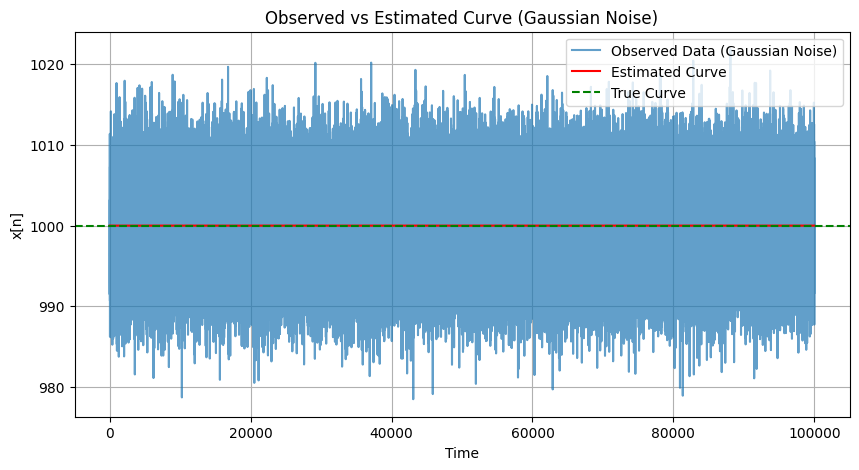

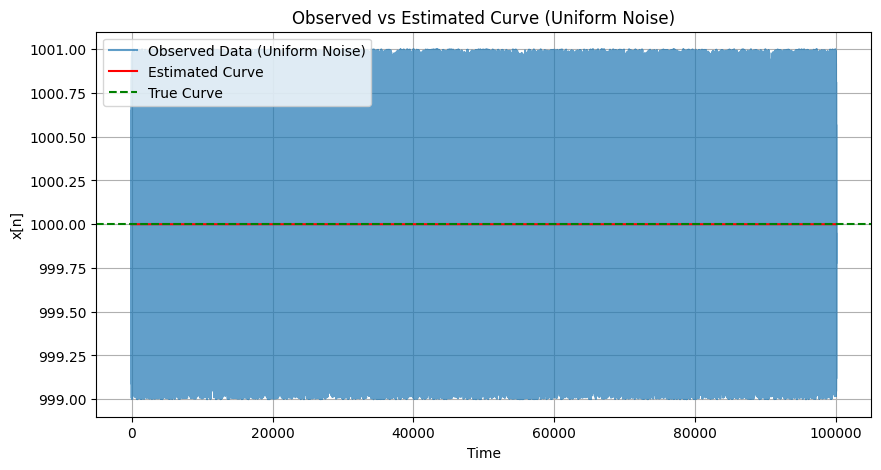

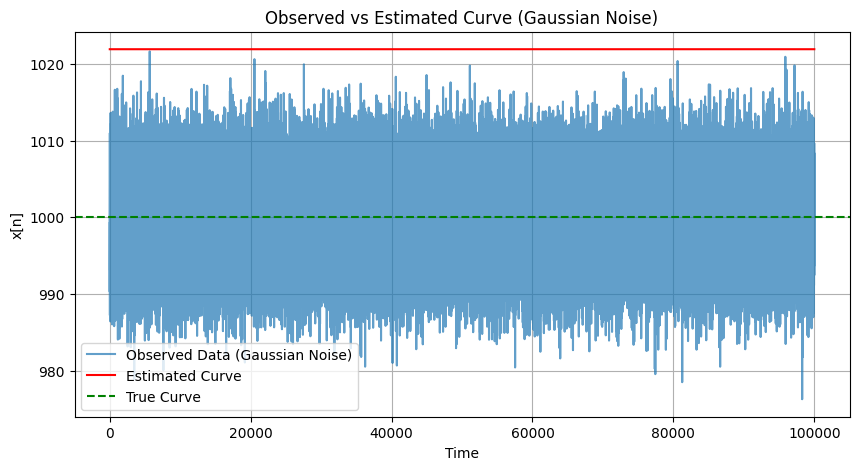

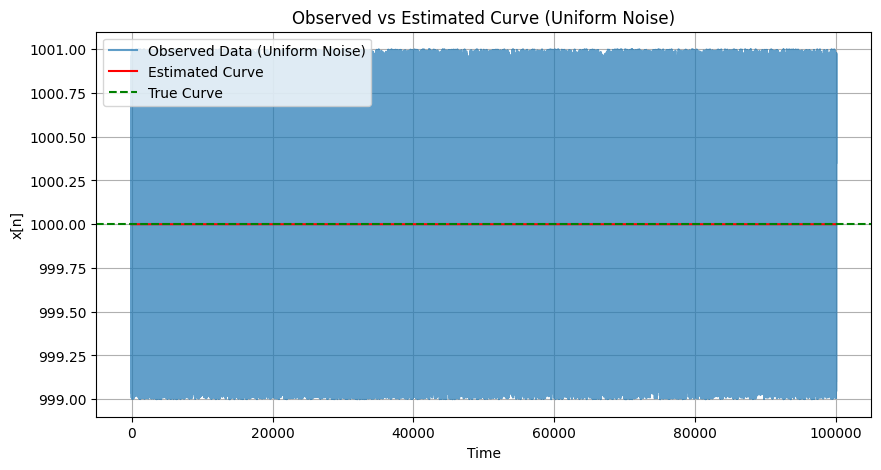

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_observed_vs_estimated(x, estimated_params, noise_type, true_params, N):
    """
    Plot the observed data versus the estimated curve for Gaussian and Uniform noise cases.

    x: Observed data vector (N x 1)
    estimated_params: Parameters estimated from the data
    noise_type: Type of noise ('gaussian' or 'uniform')
    true_params: Tuple of true parameters (A, lambda) for uniform noise
    N: Number of observations
    """
    # Generate time vector for plotting
    t = np.arange(N)

    if noise_type == 'gaussian':
        # Extract estimated parameters
        A_est = estimated_params

        # True and estimated curves
        true_curve = true_params[0] + np.zeros(N)
        estimated_curve = A_est + np.zeros(N)

        # Plot Observed vs Estimated Curves for Gaussian Noise
        plt.figure(figsize=(10, 5))
        plt.plot(t, x, label='Observed Data (Gaussian Noise)', alpha=0.7)
        plt.plot(t, estimated_curve, label=f'Estimated Curve', color='red')
        plt.axhline(true_params[0], color='green', linestyle='dashed', linewidth=1.5, label='True Curve')
        plt.title('Observed vs Estimated Curve (Gaussian Noise)')
        plt.xlabel('Time')
        plt.ylabel('x[n]')
        plt.legend()
        plt.grid(True)
        plt.show()

    elif noise_type == 'uniform':
        # Extract estimated parameters
        A_est, lambda_est = estimated_params

        # True and estimated curves
        true_curve = true_params[0] + np.zeros(N)
        estimated_curve = A_est + np.zeros(N)

        # Plot Observed vs Estimated Curves for Uniform Noise
        plt.figure(figsize=(10, 5))
        plt.plot(t, x, label='Observed Data (Uniform Noise)', alpha=0.7)
        plt.plot(t, estimated_curve, label=f'Estimated Curve', color='red')
        plt.axhline(true_params[0], color='green', linestyle='dashed', linewidth=1.5, label='True Curve')
        plt.title('Observed vs Estimated Curve (Uniform Noise)')
        plt.xlabel('Time')
        plt.ylabel('x[n]')
        plt.legend()
        plt.grid(True)
        plt.show()

# Plot for Gaussian noise
plot_observed_vs_estimated(
    generate_data_gaussian(N, true_params_gaussian[0], true_params_gaussian[1]),
    [A_mean_gaussian],
    'gaussian',
    true_params_gaussian,
    N
)

# Plot for Uniform noise
plot_observed_vs_estimated(
    generate_data_uniform(N, true_params_uniform[0], true_params_uniform[1]),
    [A_mean_uniform, lambda_mean_uniform],
    'uniform',
    true_params_uniform,
    N
)

plot_observed_vs_estimated(
    generate_data_gaussian(N, true_params_gaussian[0], true_params_gaussian[1]),
    [A_max_gaussian],
    'gaussian',
    true_params_gaussian,
    N
)

plot_observed_vs_estimated(
    generate_data_uniform(N, true_params_uniform[0], true_params_uniform[1]),
    [A_max_uniform, lambda_max_uniform],
    'uniform',
    true_params_uniform,
    N
)

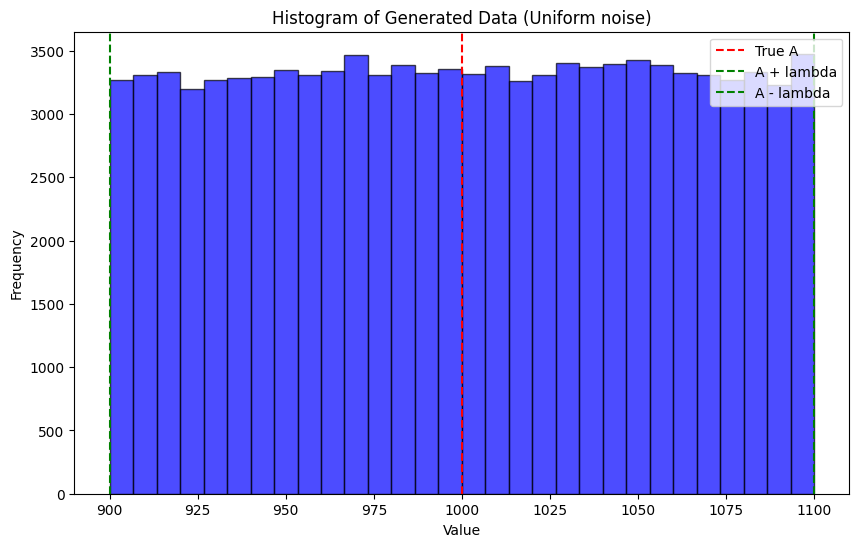

In [ ]:
import matplotlib.pyplot as plt

def plot_data_histogram(data, A_true, lambda_param, noise_type):
    plt.figure(figsize=(10, 6))
    plt.hist(data, bins=30, alpha=0.7, color='blue', edgecolor='black')
    plt.axvline(A_true, color='red', linestyle='dashed', linewidth=1.5, label='True A')
    plt.axvline(A_true + lambda_param, color='green', linestyle='dashed', linewidth=1.5, label='A + lambda')
    plt.axvline(A_true - lambda_param, color='green', linestyle='dashed', linewidth=1.5, label='A - lambda')
    plt.title(f'Histogram of Generated Data ({noise_type} noise)')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

# Use this function to visualize your data
A_true = 1000
lambda_param = 100
x = generate_data_uniform(N, A_true, lambda_param)
plot_data_histogram(x, A_true, lambda_param, 'Uniform')
